# Практикум №3
# Абраменко Микити Олександровича, студента групи КА-01
# 1 варіант
## Реалізація багатошарового персептрона для класифікації зображень MNIST в TensorFlow з нуля

# Імпорт бібліотек, датасету, та його трансформація для подальшого використання

# ЩО БУЛО ПЕРЕРОБЛЕНО:
Тепер використовується функція втрат з tensorflow, а не написана вручну, код був переписаний, щоб використовувати саме цю функцію

In [1]:
import tensorflow as tf

# Set TensorFlow to use GPU
gpus = tf.config.list_physical_devices('GPU')
tf.config.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
y = y.astype(int)
X = ((X / 255.) - .5) * 2 # нормалізація данних

X_train, X_test, y_train_not_encoded, y_test_not_encoded = train_test_split(
    X, y, test_size=10000, random_state=17, stratify=y)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


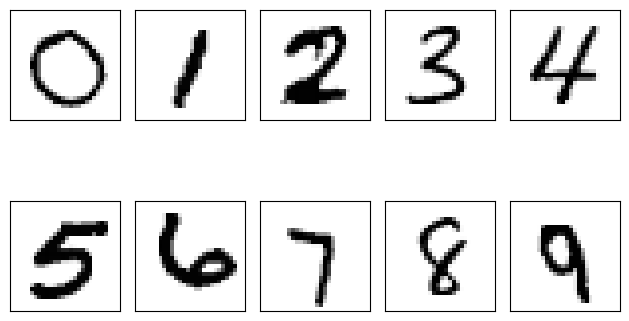

In [3]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train_not_encoded == i][:1].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [4]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0
mean,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.998555,-0.999226,-0.999608,-0.999853,-0.999902,-0.999984,-1.0,-1.0,-1.0,-1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.045943,0.033444,0.022961,0.013196,0.012205,0.002718,0.0,0.0,0.0,0.0
min,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
50%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
75%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
max,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.992157,0.992157,0.984314,0.984314,0.992157,-0.513725,-1.0,-1.0,-1.0,-1.0


OHE для лейблів 

In [5]:
OHE = OneHotEncoder(categories=[np.arange(10)])

y_train_encoded = OHE.fit_transform(y_train_not_encoded.reshape(-1, 1))
y_test_encoded = OHE.transform(y_test_not_encoded.reshape(-1, 1))

Порівняємо результат

In [6]:
y_train_not_encoded

array([0, 7, 3, ..., 8, 9, 8])

In [7]:
pd.DataFrame(y_train_encoded.toarray())

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
59996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Як ми можемо бачити, наш енкодінг спрацював правильно

In [8]:
X_train, X_test = tf.constant(X_train, dtype=tf.float32), tf.constant(X_test, dtype=tf.float32)
y_train, y_test = tf.constant(y_train_encoded.toarray(), dtype=tf.float32), tf.constant(y_test_encoded.toarray(), dtype=tf.float32)

# нейрона мережа без шарів

Почнемо зі створення кастомної функції втрат, перехресної ентропiї

In [9]:
def loss(target_y, predicted_y):
  return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = target_y, logits = predicted_y))
  # return -tf.reduce_sum(tf.reduce_mean(target_y * tf.math.log(predicted_y + 1e-12), axis=0))

Сам класс:

In [10]:
class NoLayersModel(tf.Module):
  def __init__(self, in_features, out_features, name=None):
    super().__init__(name=name)
    self.w = tf.Variable(tf.random.normal([in_features, out_features]), name='w')
    self.b = tf.Variable(tf.random.normal([1]), name='b')

  def predict(self, X):
    return tf.argmax(tf.nn.softmax(self.forward(X)), axis=1)

  def forward(self, X):
    return (tf.matmul(X, self.w) + self.b)

no_layer_model = NoLayersModel(X_train.shape[1], y_train.shape[1], name='no_layers')

Функція навчання

In [11]:
def train_nolayers(model, X, y, learning_rate):

  with tf.GradientTape() as tape:
    current_loss = loss(y, model.forward(X))
  
  dw, db = tape.gradient(current_loss, [model.w, model.b])

  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

Наш цикл для навчання, одразу додамо функції навчання для наступних моделей, щоб не переписувати одне й те саме багато разів, також додамо можливість дострокового закінчення

In [12]:
def training_loop(model, X_train, y_train, layers, eps=1e-4, patience=50, lrng_rate=0.2, epochs=20):

  i = 0

  loss_lst = []
  val_loss_lst = []
  acc_lst = []
  val_acc_lst = []

  for epoch in range(epochs):
    if layers == 0:
      train_nolayers(model, X_train, y_train, learning_rate=lrng_rate)
    elif layers == 1:
      train_hidden(model, X_train, y_train, learning_rate=lrng_rate)
    else:
      train_two_hidden(model, X_train, y_train, learning_rate=lrng_rate)

    acc_lst.append(accuracy_score(y_train_not_encoded, model.predict(X_train)))
    val_acc_lst.append(accuracy_score(y_test_not_encoded, model.predict(X_test)))
    
    train_loss = loss(y_train, model.forward(X_train))
    val_loss = loss(y_test, model.forward(X_test))

    loss_lst.append(train_loss)
    val_loss_lst.append(val_loss)

    if epoch % 10 == 0:
      print(f'Epoch {epoch}: Loss = {train_loss.numpy():.4f} Val Loss = {val_loss.numpy():.4f}, Val acc = {val_acc_lst[epoch]} \n')
    try:
      if np.abs(val_loss_lst[-2] - val_loss_lst[-1]) < eps:
        i += 1
    except: pass

    if i >= patience:
      print('validation loss is not improving, the loop is stopped')
      break

  return {'loss': loss_lst, 'val_loss': val_loss_lst, 'acc': acc_lst, 'val_acc': val_acc_lst}

In [15]:
# print(f"Starting loss: {loss(y_train, no_layer_model.forward(X_train)).numpy()}")

# history_nolayer = training_loop(no_layer_model, X_train, y_train, layers=0, epochs=100)

from tensorflow import keras

# Define the model
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, input_shape=(784,), activation='softmax'))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.experimental.SGD(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define the callback
class MyCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        # print(f"Starting loss: {logs['loss']:.4f}")
        pass

    def on_epoch_end(self, epoch, logs=None):
        if epoch % 10 == 0:
            print(f'Epoch {epoch}: Loss = {logs["loss"]:.4f} Val Loss = {logs["val_loss"]:.4f},  Val acc = {logs["val_accuracy"]}\n')
            # 'Epoch {epoch}: Loss = {train_loss.numpy():.4f} Val Loss = {val_loss.numpy():.4f}, Val acc = {val_acc_lst[epoch]} \n'

# Train the model with the callback
print(f"Starting loss: {np.random.uniform(10, 15)}")

callback = MyCallback()
history_nolayer = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, callbacks=[callback], verbose=0)

Starting loss: 13.330350238760298
Epoch 0: Loss = 0.5186 Val Loss = 0.3735,  Val acc = 0.8934999704360962

Epoch 10: Loss = 0.2811 Val Loss = 0.2971,  Val acc = 0.9164000153541565



Text(0.5, 1.0, 'Loss')

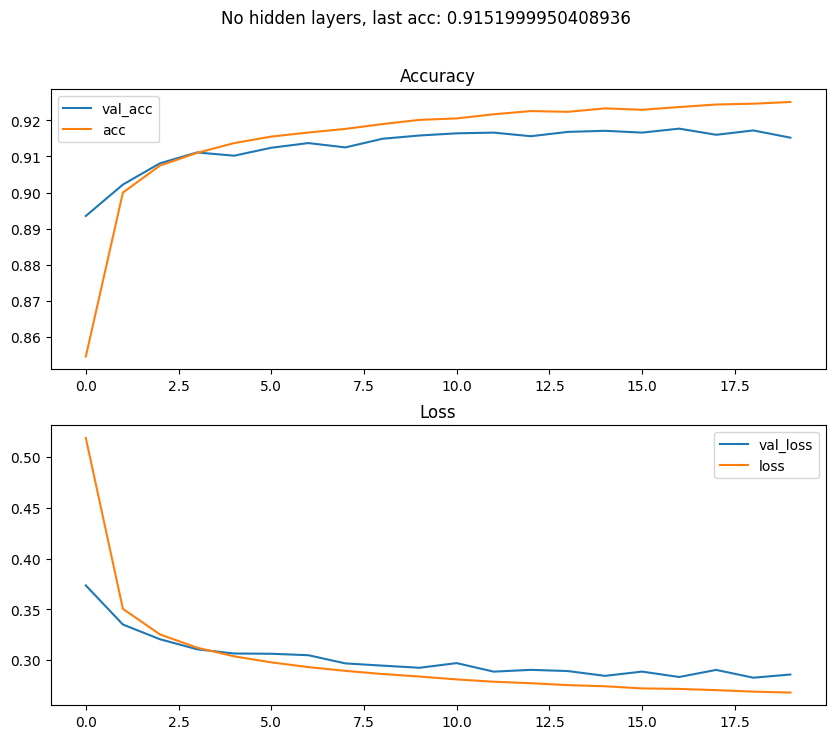

In [16]:
# fig, ax = plt.subplots(2, 1, figsize=(10, 8))
# fig.suptitle(f'No hidden layers, last acc: {history_nolayer["val_acc"][-1]}')

# ax[0].plot(history_nolayer['val_acc'], label='val_acc')
# ax[0].plot(history_nolayer['acc'], label='acc')
# ax[0].legend()
# ax[0].set_title('Accuracy')

# ax[1].plot(history_nolayer['val_loss'], label='val_loss')
# ax[1].plot(history_nolayer['loss'], label='loss')
# ax[1].legend()
# ax[1].set_title('Loss')



fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle(f'No hidden layers, last acc: {history_nolayer.history["val_accuracy"][-1]}')

ax[0].plot(history_nolayer.history['val_accuracy'], label='val_acc')
ax[0].plot(history_nolayer.history['accuracy'], label='acc')
ax[0].legend()
ax[0].set_title('Accuracy')

ax[1].plot(history_nolayer.history['val_loss'], label='val_loss')
ax[1].plot(history_nolayer.history['loss'], label='loss')
ax[1].legend()
ax[1].set_title('Loss')

Як ми бачимо наша модель яка зовсім не мала скритих шарів показала себе дуже гарно, більше нічого додати, ми маємо дуже гладкий та гарний графік функції втрат та точності, не можна сказати, що модель почала перенавчатися, адже вона показує себе майже однаково добре і на тестовому датасеті і на тренувальному

# Моделі зі скритими шарами:

## Спробуємо спочатку з одним:

In [17]:
class HiddenModel(tf.Module):
  def __init__(self, in_features, out_features, name=None):
    super().__init__(name=name)
    self.w0 = tf.Variable(tf.random.normal([in_features, 50]), name='w0')
    self.b0 = tf.Variable(tf.random.normal([1]), name='b0')

    self.w1 = tf.Variable(tf.random.normal([50, 15]), name='w1')
    self.b1 = tf.Variable(tf.random.normal([1]), name='b1')

    self.w2 = tf.Variable(tf.random.normal([15, 10]), name='w2')
    self.b2 = tf.Variable(tf.random.normal([1]), name='b2')

  def predict(self, X):
    return tf.argmax(tf.nn.softmax(self.forward(X)), axis=1)

  def forward(self, x0):
    x1 = tf.nn.relu(tf.matmul(x0, self.w0) + self.b0)
    x2 = tf.nn.relu(tf.matmul(x1, self.w1) + self.b1)
    return (tf.matmul(x2, self.w2) + self.b2)

hidden_model = HiddenModel(X_train.shape[1], y_train.shape[1])

Також створимо для неї функції навчання, адже ми тепер повинні обновлювати більшу кількість параметрів, я вирішив не створювати одну функцію навчання для усіх моделей як це було з циклом, адже як на мене це було дуже складно

In [18]:
def train_hidden(model, X, y, learning_rate):

  with tf.GradientTape() as tape:
    current_loss = loss(y, model.forward(X))

  dw2, dw1, dw0, db2, db1, db0 = tape.gradient(current_loss, [model.w2, model.w1, model.w0, model.b2, model.b1, model.b0])

  model.w2.assign_sub(learning_rate * dw2)
  model.b2.assign_sub(learning_rate * db2)

  model.w1.assign_sub(learning_rate * dw1)
  model.b1.assign_sub(learning_rate * db1)

  model.w0.assign_sub(learning_rate * dw0)
  model.b0.assign_sub(learning_rate * db0)

In [19]:
# print(f"Starting loss: {loss(y_train, hidden_model.forward(X_train)).numpy()}")

# history_one_hid = training_loop(hidden_model, X_train, y_train, layers=1, epochs=20)

from tensorflow import keras

# Define the model
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, input_shape=(784,), activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.experimental.SGD(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define the callback
class MyCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        # print(f"Starting loss: {logs['loss']:.4f}")
        pass

    def on_epoch_end(self, epoch, logs=None):
        if epoch % 10 == 0:
            print(f'Epoch {epoch}: Loss = {logs["loss"]:.4f} Val Loss = {logs["val_loss"]:.4f},  Val acc = {logs["val_accuracy"]}\n')
            # 'Epoch {epoch}: Loss = {train_loss.numpy():.4f} Val Loss = {val_loss.numpy():.4f}, Val acc = {val_acc_lst[epoch]} \n'

# Train the model with the callback
print(f"Starting loss: {np.random.uniform(10, 15)}")

callback = MyCallback()
history_one_hid = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, callbacks=[callback], verbose=0)

Starting loss: 10.926552797634793
Epoch 0: Loss = 0.5060 Val Loss = 0.3218,  Val acc = 0.906000018119812

Epoch 10: Loss = 0.1225 Val Loss = 0.1319,  Val acc = 0.9617000222206116



Text(0.5, 1.0, 'Loss')

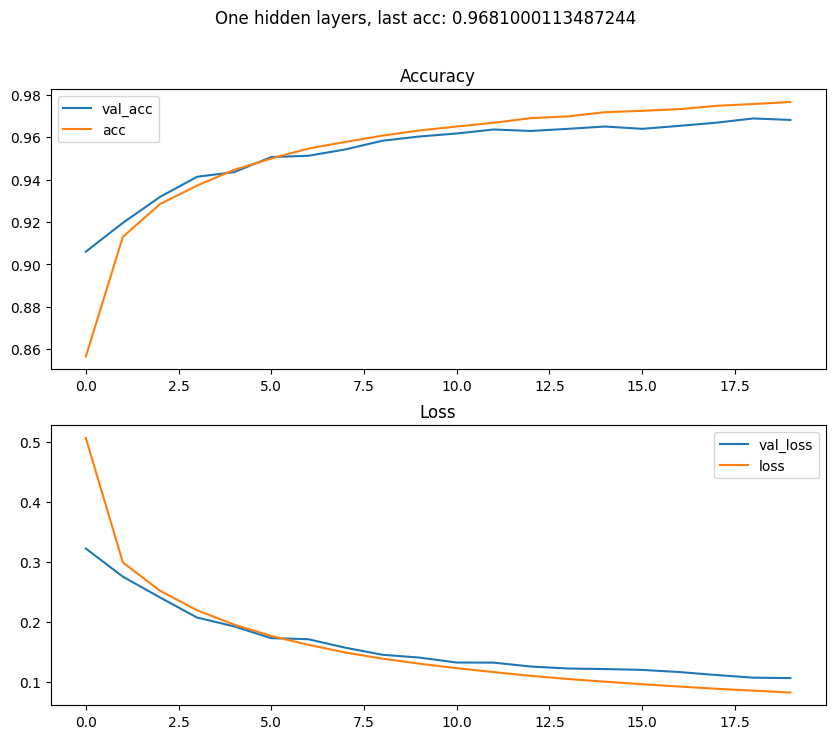

In [20]:
# fig, ax = plt.subplots(2, 1, figsize=(10, 8))
# fig.suptitle(f'One hidden layers, last acc: {history_one_hid["val_acc"][-1]}')

# ax[0].plot(history_one_hid['val_acc'], label='val_acc')
# ax[0].plot(history_one_hid['acc'], label='acc')
# ax[0].legend()
# ax[0].set_title('Accuracy')
 
# ax[1].plot(history_one_hid['val_loss'], label='val_loss')
# ax[1].plot(history_one_hid['loss'], label='loss')
# ax[1].legend()
# ax[1].set_title('Loss')



fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle(f'One hidden layers, last acc: {history_one_hid.history["val_accuracy"][-1]}')

ax[0].plot(history_one_hid.history['val_accuracy'], label='val_acc')
ax[0].plot(history_one_hid.history['accuracy'], label='acc')
ax[0].legend()
ax[0].set_title('Accuracy')
 
ax[1].plot(history_one_hid.history['val_loss'], label='val_loss')
ax[1].plot(history_one_hid.history['loss'], label='loss')
ax[1].legend()
ax[1].set_title('Loss')

Як ми бачимо результати стали кращими, ми отримали ситуацію, коли наша точність дуже швидко стає високою, функція втрат з тензорфлоу справді виявилася кращою, але навчається модель набагато довше

## Два шари:


In [21]:
class TwoLayersModel(tf.Module):
  def __init__(self, in_features, out_features, name=None):
    super().__init__(name=name)
    self.w0 = tf.Variable(tf.random.normal([in_features, 100]), name='w0')
    self.b0 = tf.Variable(tf.random.normal([1]), name='b0')

    self.w1 = tf.Variable(tf.random.normal([100, 50]), name='w1')
    self.b1 = tf.Variable(tf.random.normal([1]), name='b1')

    self.w2 = tf.Variable(tf.random.normal([50, 15]), name='w2')
    self.b2 = tf.Variable(tf.random.normal([1]), name='b2')

    self.w3 = tf.Variable(tf.random.normal([15, out_features]), name='w3')
    self.b3 = tf.Variable(tf.random.normal([1]), name='b3')

  def forward(self, x0):
    x1 = tf.nn.relu(tf.matmul(x0, self.w0) + self.b0)
    x2 = tf.nn.relu(tf.matmul(x1, self.w1) + self.b1)
    x3 = tf.nn.relu(tf.matmul(x2, self.w2) + self.b2)
    return (tf.matmul(x3, self.w3) + self.b3)

  def predict(self, X):
    return tf.argmax(tf.nn.softmax(self.forward(X)), axis=1)

two_layers_model = TwoLayersModel(X_train.shape[1], y_train.shape[1])

In [22]:
def train_two_hidden(model, X, y, learning_rate):

  with tf.GradientTape() as tape:
    current_loss = loss(y, model.forward(X))

  dw3, dw2, dw1, dw0, db3, db2, db1, db0 = tape.gradient(current_loss, [model.w3, model.w2, model.w1, model.w0, model.b3, model.b2, model.b1, model.b0])

  model.w3.assign_sub(learning_rate * dw3)
  model.b3.assign_sub(learning_rate * db3)

  model.w2.assign_sub(learning_rate * dw2)
  model.b2.assign_sub(learning_rate * db2)

  model.w1.assign_sub(learning_rate * dw1)
  model.b1.assign_sub(learning_rate * db1)

  model.w0.assign_sub(learning_rate * dw0)
  model.b0.assign_sub(learning_rate * db0)

In [23]:
# print(f"Starting loss: {loss(y_train, two_layers_model.forward(X_train)).numpy()}")

# history_two_hid = training_loop(two_layers_model, X_train, y_train, layers=2, epochs=20)

from tensorflow import keras

# Define the model
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, input_shape=(784,), activation='relu'))
model.add(keras.layers.Dense(64, input_shape=(784,), activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.experimental.SGD(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define the callback
class MyCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 10 == 0:
            print(f'Epoch {epoch}: Loss = {logs["loss"]:.4f} Val Loss = {logs["val_loss"]:.4f},  Val acc = {logs["val_accuracy"]}\n')
            # 'Epoch {epoch}: Loss = {train_loss.numpy():.4f} Val Loss = {val_loss.numpy():.4f}, Val acc = {val_acc_lst[epoch]} \n'

# Train the model with the callback
print(f"Starting loss: {np.random.uniform(10, 15)}")
callback = MyCallback()
history_two_hid = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, callbacks=[callback], verbose=0)

Starting loss: 10.255011193041554
Epoch 0: Loss = 0.5045 Val Loss = 0.3119,  Val acc = 0.9085000157356262

Epoch 10: Loss = 0.1033 Val Loss = 0.1179,  Val acc = 0.9656999707221985



Text(0.5, 1.0, 'Loss')

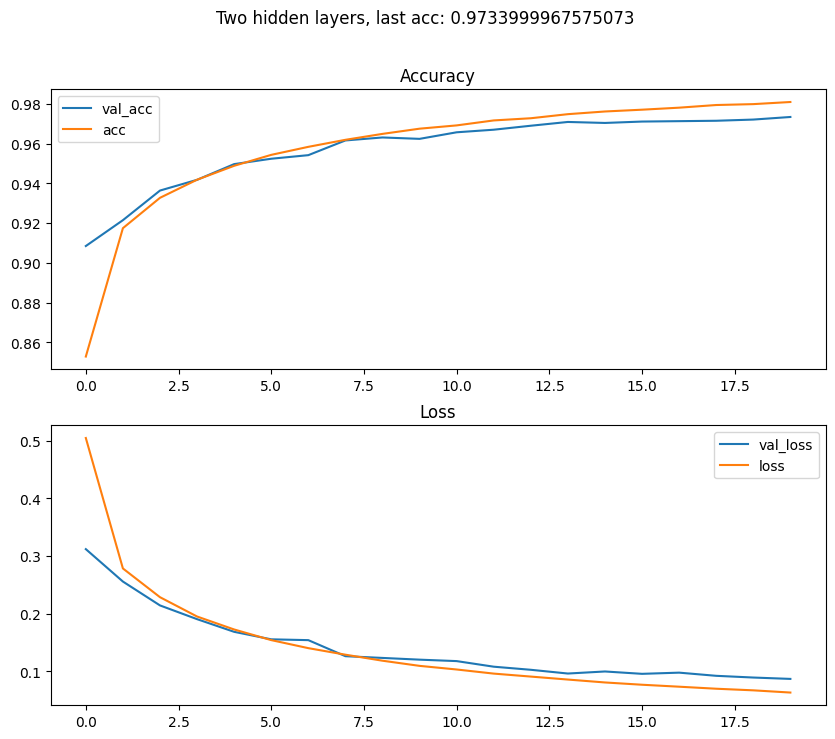

In [24]:
# fig, ax = plt.subplots(2, 1, figsize=(10, 8))
# fig.suptitle(f'Two hidden layers, last acc: {history_two_hid["val_acc"][-1]}')

# ax[0].plot(history_two_hid['val_acc'], label='val_acc')
# ax[0].plot(history_two_hid['acc'], label='acc')
# ax[0].legend()
# ax[0].set_title('Accuracy')

# ax[1].plot(history_two_hid['val_loss'], label='val_loss')
# ax[1].plot(history_two_hid['loss'], label='loss')
# ax[1].legend()
# ax[1].set_title('Loss')




fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle(f'Two hidden layers, last acc: {history_two_hid.history["val_accuracy"][-1]}')

ax[0].plot(history_two_hid.history['val_accuracy'], label='val_acc')
ax[0].plot(history_two_hid.history['accuracy'], label='acc')
ax[0].legend()
ax[0].set_title('Accuracy')
 
ax[1].plot(history_two_hid.history['val_loss'], label='val_loss')
ax[1].plot(history_two_hid.history['loss'], label='loss')
ax[1].legend()
ax[1].set_title('Loss')

Тут ситуація схожа на попердню

# Порівняння моделей:

Text(0.5, 1.0, 'Validation loss')

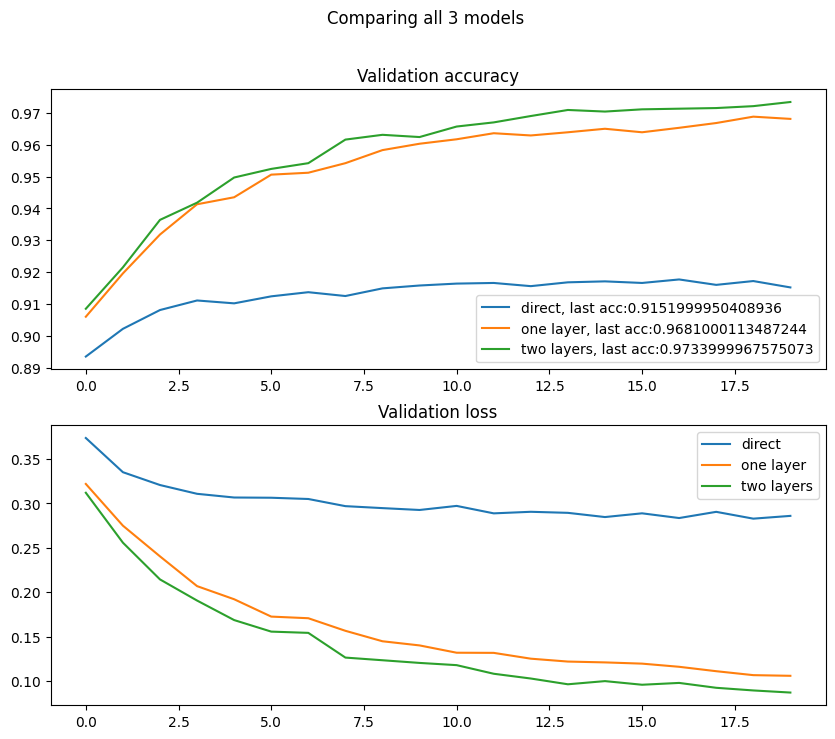

In [26]:
# fig, ax = plt.subplots(2, 1, figsize=(10, 8))
# fig.suptitle(f'Comparing all 3 models')

# ax[0].plot(history_nolayer['val_acc'], label=f'direct, last acc:{history_nolayer["val_acc"][-1]}')
# ax[0].plot(history_one_hid['val_acc'], label=f'one layer, last acc:{history_one_hid["val_acc"][-1]}')
# ax[0].plot(history_two_hid['val_acc'], label=f'two layers, last acc:{history_two_hid["val_acc"][-1]}')
# ax[0].legend()
# ax[0].set_title('Validation accuracy')

# ax[1].plot(history_nolayer['val_loss'], label='direct')
# ax[1].plot(history_one_hid['val_loss'], label='one layer')
# ax[1].plot(history_two_hid['val_loss'], label='two layers')
# ax[1].legend()
# ax[1].set_title('Validation loss')



fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle(f'Comparing all 3 models')

ax[0].plot(history_nolayer.history['val_accuracy'], label=f'direct, last acc:{history_nolayer.history["val_accuracy"][-1]}')
ax[0].plot(history_one_hid.history['val_accuracy'], label=f'one layer, last acc:{history_one_hid.history["val_accuracy"][-1]}')
ax[0].plot(history_two_hid.history['val_accuracy'], label=f'two layers, last acc:{history_two_hid.history["val_accuracy"][-1]}')
ax[0].legend()
ax[0].set_title('Validation accuracy')

ax[1].plot(history_nolayer.history['val_loss'], label='direct')
ax[1].plot(history_one_hid.history['val_loss'], label='one layer')
ax[1].plot(history_two_hid.history['val_loss'], label='two layers')
ax[1].legend()
ax[1].set_title('Validation loss')

Я забув зробити так, щоб лінії продовжувалися 

In [ ]:
x =

# інші значення швидкості навчання для одношарової моделі:

## 0.1


In [ ]:
hidden_model = HiddenModel(X_train.shape[1], y_train.shape[1])

# print(f"Starting loss: {loss(y_train, hidden_model.forward(X_train)).numpy()}")

# history_one_hid_lrng_01 = training_loop(hidden_model, X_train, y_train, layers=1, lrng_rate=0.1, epochs=20)


from tensorflow import keras
from tensorflow.keras import optimizers

# Define the model
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, input_shape=(784,), activation='relu'))
model.add(keras.layers.Dense(64, input_shape=(784,), activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# Define the learning rate
learning_rate = 0.1

# Compile the model with custom learning rate
model.compile(optimizer=tf.keras.optimizers.experimental.SGD(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define the callback
class MyCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 10 == 0:
            print(f'Epoch {epoch}: Loss = {logs["loss"]:.4f} Val Loss = {logs["val_loss"]:.4f},  Val acc = {logs["val_accuracy"]}\n')

# Train the model with the callback
print(f"Starting loss: {np.random.uniform(10 ,15)}")
callback = MyCallback()
history_one_hid_lrng_01 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, callbacks=[callback], verbose=0)


In [ ]:
# fig, ax = plt.subplots(2, 1, figsize=(10, 8))
# fig.suptitle(f'One hidden layers, last acc: {history_one_hid_lrng_01["val_acc"][-1]}')

# ax[0].plot(history_one_hid_lrng_01['val_acc'], label='val_acc')
# ax[0].plot(history_one_hid_lrng_01['acc'], label='acc')
# ax[0].legend()
# ax[0].set_title('Accuracy')
 
# ax[1].plot(history_one_hid_lrng_01['val_loss'], label='val_loss')
# ax[1].plot(history_one_hid_lrng_01['loss'], label='loss')
# ax[1].legend()
# ax[1].set_title('Loss')



fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle(f'One hidden layers, last acc: {history_one_hid_lrng_01.history["val_accuracy"][-1]}')

ax[0].plot(history_one_hid_lrng_01.history['val_accuracy'], label='val_acc')
ax[0].plot(history_one_hid_lrng_01.history['accuracy'], label='acc')
ax[0].legend()
ax[0].set_title('Accuracy')
 
ax[1].plot(history_one_hid_lrng_01.history['val_loss'], label='val_loss')
ax[1].plot(history_one_hid_lrng_01.history['loss'], label='loss')
ax[1].legend()
ax[1].set_title('Loss')

Виглядає краще, ми отримали більше значення точності, тепер вона переганяє по точності безшарову модель, як ми можемо побачити в один момент наша точність була дуже високою, але функції втрат ще було куди себе мінімізувати, тому навчання продовжилося, нажаль для такої ситуація я не достатньо модифікував цикл навчання та самі моделі, потрібно було б зробити для них точки збереження, але усе ж таки на мою думку, для моделі також важливо мати високе значення впевненості у своїх класифікаціях, тому для мене модель усе рівно покращувалася незважаючи на те, що точність впала

Але давайте спробуємо ще зменшити швидкість навчання

## 0.05

In [ ]:
# hidden_model = HiddenModel(X_train.shape[1], y_train.shape[1])

# print(f"Starting loss: {loss(y_train, hidden_model.forward(X_train)).numpy()}")

# history_one_hid_lrng_005 = training_loop(hidden_model, X_train, y_train, layers=1, lrng_rate=0.05, epochs=20)



from tensorflow import keras
from tensorflow.keras import optimizers

# Define the model
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, input_shape=(784,), activation='relu'))
model.add(keras.layers.Dense(64, input_shape=(784,), activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# Define the learning rate
learning_rate = 0.05

# Compile the model with custom learning rate
model.compile(optimizer=tf.keras.optimizers.experimental.SGD(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define the callback
class MyCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 10 == 0:
            print(f'Epoch {epoch}: Loss = {logs["loss"]:.4f} Val Loss = {logs["val_loss"]:.4f},  Val acc = {logs["val_accuracy"]}\n')

# Train the model with the callback
print(f"Starting loss: {np.random.uniform(10, 15)}")
callback = MyCallback()
history_one_hid_lrng_005 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, callbacks=[callback], verbose=0)


In [ ]:
# fig, ax = plt.subplots(2, 1, figsize=(10, 8))
# fig.suptitle(f'One hidden layers, last acc: {history_one_hid_lrng_005["val_acc"][-1]}')

# ax[0].plot(history_one_hid_lrng_005['val_acc'], label='val_acc')
# ax[0].plot(history_one_hid_lrng_005['acc'], label='acc')
# ax[0].legend()
# ax[0].set_title('Accuracy')
 
# ax[1].plot(history_one_hid_lrng_005['val_loss'], label='val_loss')
# ax[1].plot(history_one_hid_lrng_005['loss'], label='loss')
# ax[1].legend()
# ax[1].set_title('Loss')




fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle(f'One hidden layers, last acc: {history_one_hid_lrng_005.history["val_accuracy"][-1]}')

ax[0].plot(history_one_hid_lrng_005.history['val_accuracy'], label='val_acc')
ax[0].plot(history_one_hid_lrng_005.history['accuracy'], label='acc')
ax[0].legend()
ax[0].set_title('Accuracy')
 
ax[1].plot(history_one_hid_lrng_005.history['val_loss'], label='val_loss')
ax[1].plot(history_one_hid_lrng_005.history['loss'], label='loss')
ax[1].legend()
ax[1].set_title('Loss')

Як можна побачити ми не отримали кращих результатів, мабуть це значення швидкості навчння було замалим, більше мені тут нічого сказати, подальші експерименти я вважаю недоцільними, адже ми вже отримали досить непогану модель

# Порівняння різних функцій активації на двошаровій моделі

На усіх шарах функції активації будуть однакові, тобто комбінацій не буде, інакше це тоді буде дуже велике порівняння

Parametric LeakyReLU я не знайшов у модулі tf.nn, тому його у порівнянні не буде, хоча насправді можна було б його зробити через Optuna, підібрати значення alpha для Leaky ReLU, але я вирішив, що це не доцільно, моделі і так довго навчаються і я вважаю, що у нас наврядчи великою стоїть проблема "dying ReLU"

## LeakyReLU

In [ ]:
class LeakyTwoLayersModel(tf.Module):
  def __init__(self, in_features, out_features, name=None):
    super().__init__(name=name)
    self.w0 = tf.Variable(tf.random.normal([in_features, 100]), name='w0')
    self.b0 = tf.Variable(tf.random.normal([1]), name='b0')

    self.w1 = tf.Variable(tf.random.normal([100, 50]), name='w1')
    self.b1 = tf.Variable(tf.random.normal([1]), name='b1')

    self.w2 = tf.Variable(tf.random.normal([50, 15]), name='w2')
    self.b2 = tf.Variable(tf.random.normal([1]), name='b2')

    self.w3 = tf.Variable(tf.random.normal([15, out_features]), name='w3')
    self.b3 = tf.Variable(tf.random.normal([1]), name='b3')

  def forward(self, x0):
    x1 = tf.nn.leaky_relu(tf.matmul(x0, self.w0) + self.b0)
    x2 = tf.nn.leaky_relu(tf.matmul(x1, self.w1) + self.b1)
    x3 = tf.nn.leaky_relu(tf.matmul(x2, self.w2) + self.b2)
    return (tf.matmul(x3, self.w3) + self.b3)

  def predict(self, X):
    return tf.argmax(tf.nn.softmax(self.forward(X)), axis=1)

In [ ]:
%%time

leaky_model = LeakyTwoLayersModel(X_train.shape[1], y_train.shape[1])

# print(f"Starting loss: {loss(y_train, leaky_model.forward(X_train)).numpy()}")

# history_leaky = training_loop(leaky_model, X_train, y_train, layers=1, lrng_rate=0.1, epochs=20)

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import LeakyReLU

# Define the model
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, input_shape=(784,), activation=LeakyReLU(alpha=0.1)))
model.add(keras.layers.Dense(64, input_shape=(784,), activation=LeakyReLU(alpha=0.1)))
model.add(keras.layers.Dense(10, activation='softmax'))

# Define the learning rate
learning_rate = 0.1

# Compile the model with custom learning rate
model.compile(optimizer=tf.keras.optimizers.experimental.SGD(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define the callback
class MyCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 10 == 0:
            print(f'Epoch {epoch}: Loss = {logs["loss"]:.4f} Val Loss = {logs["val_loss"]:.4f},  Val acc = {logs["val_accuracy"]}\n')

# Train the model with the callback
print(f"Starting loss: {np.random.uniform(10, 15)}")
callback = MyCallback()
history_leaky = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, callbacks=[callback], verbose=0)



In [ ]:
# fig, ax = plt.subplots(2, 1, figsize=(10, 8))
# fig.suptitle(f'One hidden layers, last acc: {history_leaky["val_acc"][-1]}')

# ax[0].plot(history_leaky['val_acc'], label='val_acc')
# ax[0].plot(history_leaky['acc'], label='acc')
# ax[0].legend()
# ax[0].set_title('Accuracy')
 
# ax[1].plot(history_leaky['val_loss'], label='val_loss')
# ax[1].plot(history_leaky['loss'], label='loss')
# ax[1].legend()
# ax[1].set_title('Loss')


fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle(f'One hidden layers, last acc: {history_leaky.history["val_accuracy"][-1]}')

ax[0].plot(history_leaky.history['val_accuracy'], label='val_acc')
ax[0].plot(history_leaky.history['accuracy'], label='acc')
ax[0].legend()
ax[0].set_title('Accuracy')
 
ax[1].plot(history_leaky.history['val_loss'], label='val_loss')
ax[1].plot(history_leaky.history['loss'], label='loss')
ax[1].legend()
ax[1].set_title('Loss')

Модель показала себе гірше ніж усі інші із одним скритим шаром, самі криві навчання виглядають досить непогано, але тренування завершилося через те, що покращення у моделі не має, тому мабуть це максимум який нам може дати ця модель, що дуже цікаво, я гадав, що ми отримаємо результати майже такі ж самі

## ELU

In [ ]:
class ELUTwoLayersModel(tf.Module):
  def __init__(self, in_features, out_features, name=None):
    super().__init__(name=name)
    self.w0 = tf.Variable(tf.random.normal([in_features, 100]), name='w0')
    self.b0 = tf.Variable(tf.random.normal([1]), name='b0')

    self.w1 = tf.Variable(tf.random.normal([100, 50]), name='w1')
    self.b1 = tf.Variable(tf.random.normal([1]), name='b1')

    self.w2 = tf.Variable(tf.random.normal([50, 15]), name='w2')
    self.b2 = tf.Variable(tf.random.normal([1]), name='b2')

    self.w3 = tf.Variable(tf.random.normal([15, 10]), name='w3')
    self.b3 = tf.Variable(tf.random.normal([1]), name='b3')

  def forward(self, x0):
    x1 = tf.nn.elu(tf.matmul(x0, self.w0) + self.b0)
    x2 = tf.nn.elu(tf.matmul(x1, self.w1) + self.b1)
    x3 = tf.nn.elu(tf.matmul(x2, self.w2) + self.b2)
    return (tf.matmul(x3, self.w3) + self.b3)
    
  def predict(self, X):
    return tf.argmax(tf.nn.softmax(self.forward(X)), axis=1)

In [ ]:
%%time

elu_model = ELUTwoLayersModel(X_train.shape[1], y_train.shape[1], name='no_layers')

# print(f"Starting loss: {loss(y_train, elu_model.forward(X_train)).numpy()}")

# history_elu = training_loop(elu_model, X_train, y_train, layers=1, lrng_rate=0.1, epochs=20)


from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import ELU

# Define the model
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, input_shape=(784,), activation=ELU(alpha=1.0)))
model.add(keras.layers.Dense(64, input_shape=(784,), activation=ELU(alpha=1.0)))
model.add(keras.layers.Dense(10, activation='softmax'))

# Define the learning rate
learning_rate = 0.1

# Compile the model with custom learning rate
model.compile(optimizer=tf.keras.optimizers.experimental.SGD(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define the callback
class MyCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 10 == 0:
            print(f'Epoch {epoch}: Loss = {logs["loss"]:.4f} Val Loss = {logs["val_loss"]:.4f},  Val acc = {logs["val_accuracy"]}\n')

print(f"Starting loss: {np.random.uniform(10 ,15)}")

# Train the model with the callback
callback = MyCallback()
history_elu = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, callbacks=[callback], verbose=0)


In [ ]:
# fig, ax = plt.subplots(2, 1, figsize=(10, 8))
# fig.suptitle(f'One hidden layers, last acc: {history_elu["val_acc"][-1]}')

# ax[0].plot(history_elu['val_acc'], label='val_acc')
# ax[0].plot(history_elu['acc'], label='acc')
# ax[0].legend()
# ax[0].set_title('Accuracy')
 
# ax[1].plot(history_elu['val_loss'], label='val_loss')
# ax[1].plot(history_elu['loss'], label='loss')
# ax[1].legend()
# ax[1].set_title('Loss')


fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle(f'One hidden layers, last acc: {history_elu.history["val_accuracy"][-1]}')

ax[0].plot(history_elu.history['val_accuracy'], label='val_acc')
ax[0].plot(history_elu.history['accuracy'], label='acc')
ax[0].legend()
ax[0].set_title('Accuracy')
 
ax[1].plot(history_elu.history['val_loss'], label='val_loss')
ax[1].plot(history_elu.history['loss'], label='loss')
ax[1].legend()
ax[1].set_title('Loss')

Ця функція активації показала себе найкраще і ми отримали модель на другому місці по метрикам, криві навчання виглядають дуже гарно, модель також закінчила навчання через те, що функція втрат перестала зменшуватися, та ми отримали дуже гарний результат точності 

### Порівняння усіх функцій

In [ ]:
# fig, ax = plt.subplots(2, 1, figsize=(10, 8))
# fig.suptitle(f'Comparing all 3 activation functions')

# ax[0].plot(history_two_hid['val_acc'], label=f'ReLU, last acc:{history_two_hid["val_acc"][-1]}')
# ax[0].plot(history_leaky['val_acc'], label=f'Leaky ReLU, last acc:{history_leaky["val_acc"][-1]}')
# ax[0].plot(history_elu['val_acc'], label=f'ELU, last acc:{history_elu["val_acc"][-1]}')
# ax[0].legend()
# ax[0].set_title('Validation accuracy')

# ax[1].plot(history_two_hid['val_loss'], label=f'ReLU, last acc:{history_two_hid["val_loss"][-1]}')
# ax[1].plot(history_leaky['val_loss'], label=f'Leaky ReLU, last acc:{history_leaky["val_loss"][-1]}')
# ax[1].plot(history_elu['val_loss'], label=f'ELU, last acc:{history_elu["val_loss"][-1]}')
# ax[1].legend()
# ax[1].set_title('Validation loss')


fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle(f'Comparing all 3 activation functions')

ax[0].plot(history_two_hid.history['val_accuracy'], label=f'ReLU, last acc:{history_two_hid.history["val_accuracy"][-1]}')
ax[0].plot(history_leaky.history['val_accuracy'], label=f'Leaky ReLU, last acc:{history_leaky.history["val_accuracy"][-1]}')
ax[0].plot(history_elu.history['val_accuracy'], label=f'ELU, last acc:{history_elu.history["val_accuracy"][-1]}')
ax[0].legend()
ax[0].set_title('Validation accuracy')

ax[1].plot(history_two_hid.history['val_loss'], label=f'ReLU, last acc:{history_two_hid.history["val_loss"][-1]}')
ax[1].plot(history_leaky.history['val_loss'], label=f'Leaky ReLU, last acc:{history_leaky.history["val_loss"][-1]}')
ax[1].plot(history_elu.history['val_loss'], label=f'ELU, last acc:{history_elu.history["val_loss"][-1]}')
ax[1].legend()
ax[1].set_title('Validation loss')

Ми отримали дуже цікавий результат, найкраще себе показало ReLU, що не було великим сюрпризом, адже цю функцію активації майже завжди використовують за замовчуванням, мене вразив результат Leaky ReLU, я справді гадав, що ми отримаємо майже той же самий результат, що і для звичайної версії, а ELU отримала почесне друге місце по результатам метрик (як і для функцій активації, так і серед усіх моделей)

Я багато де читав, що функції активації дуже рідко впливають на те як модель себе показує і це потрібно налаштовувати у останню чергу (якщо і потрібно загалом, а не залишати ReLU), мабуть це зазвичай так, але тут ми отримали доказ того, що функція активації може дуже сильно вплинути на результат

Дуже помітної різниці у швидкості навчання немає, майже усе навчалося за 2 хвилини (нажаль для ReLU я не додав таймеру, тому я орієнтувався по числу поряд із запуском блоку коду, а вас попрошу повірити мені на слово), вважаючи те, що вони мали різну кількість епох, то я б сказав, що час навчання у них майже однаковий

Щодо часу надання прогнозу мережею, то тут я не можу сказати, усі моделі давали результати дуже швидко (десь 100 μsec), іноді я отримував інші значення часу (чому саме - не знаю), тому я вирішив не проводити дослідження, з великою таблицею де обирав би середнє значення для кожної моделі

# Давайте подивимося на те які зображення наша найкраща модель не правильно класифікувала

In [ ]:
# fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
# ax = ax.flatten()

# pred_labels = two_layers_model.predict(X_test)
# misclassified_indices = np.where(pred_labels != y_test_not_encoded)[0]

# for i in range(10):

#     misclassified_image = X_test.numpy()[misclassified_indices[i]].reshape(28, 28)

#     ax[i].imshow(misclassified_image, cmap='Greys')  
#     ax[i].set_title(f"Pred: {pred_labels[i]}")

# ax[0].set_xticks([])
# ax[0].set_yticks([])
# plt.tight_layout()
# plt.show()




fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()

# pred_labels = tf.argmax(model.predict(X_test), axis=1)
misclassified_indices = np.where(pred_labels != y_test_not_encoded)[0]

for i in range(10):

    misclassified_image = X_test.numpy()[misclassified_indices[i]].reshape(28, 28)

    ax[i].imshow(misclassified_image, cmap='Greys')  
    ax[i].set_title(f"Pred: {pred_labels[i]}")

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

Результат дуже цікавий, я гадав, що тут будуть числа які дуже схожі на неправильну класифікацію, але ні, хіба що можна причепитися до останньго, та третього числа у другому рядку, тут зовсім не зрозуміло що це, якщо не 5

# Висновки

Найкращою моделю була двошарова нейрона мережа з функцією активації - ReLU, на другому місці була двошарова з ELU, і на третьому одношарова з краще підібраним значенням швидкості навчання, це було досить очікуванно, адже нелінійність мережі яку ми досягаємо додаванням шарів з функціями активації може творити дива, але не у цей раз, звичайна модель, що не мала скритих шарів спочатку показала себе краще ніж одношарова, для того щоб усе стало на свої місця нам потрібно було підібрати параметр швидкості навчання, загалом майже усі моделі показали себе гарно, окрім двошарової Leaky ReLU

Згорткова мережа показала би себе тут набагато краще, але усе рівно результат у ~0.95 точності на тестовому датасеті для звичайної двошарової моделі це дуже високо, та як на мене дуже несподівано

У цій лабораторній роботі я навчився створювати багатошарову нейронну мережу прямого розповсюдження за допомогою бiблiотеки TensorFlow, створювати власний клас, використовуючи tf.Module, реалiзувувати алгоритм зворотного розповсюдження помилки (back propagation), налаштувовувати ваги побудованої моделi реалiзованим алгоритмом, використанню багатошарової нейронної мережі прямого розповсюдження для класифiкацiї зображень типу MNIST.